# Péndulo con punto de suspensión libre

[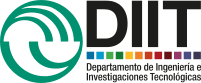](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

> Bibliografía:
>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica  
Lev Davidovich Landau, y E. M. Lifshitz  
Reverté, 1994

## Enunciado
Péndulo plano de masa \\(m_2\\), cuyo punto de suspensión (de masa \\(m_1\\)) puede desplazarse en el mismo plano sobre una recta horizontal.
1. Escriba la energía cinética, \\(T\\) y potencial, \\(V\\), en función de las coordenadas generalizadas sugeridas por las figura.
1. Verifique que al fijar la masa \\(m_1\\) recupera las expresiones de \\(T\\) y \\(V\\) de un péndulo ideal.  
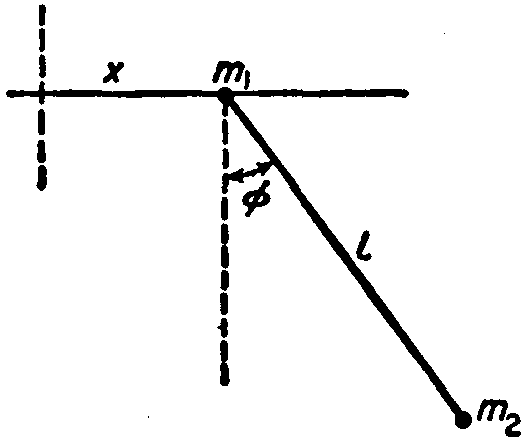

## Coordenadas generalizadas
> Referencia:
> - [Landau](https://mega.nz/file/CQInnIzJ#WenBhiu1wz57v2ulGmgfrlKzgLoNSPh4HBzWYFGh6_4) $\S1$ "Coordenas generalizadas"
> - [Apunte Lanczos](https://github.com/bettachini/UNLaM_MecanicaGeneral/blob/master/apunteLanczos/apunteLanczos.pdf) $\S 2.2$ "Coordenadas generalizadas"

### Tras leer en el apunte Lanczos $\S 2.2$, repasamos lo fundamental
Para describir los $N$ grados de libertad usaremos $q_1, q_2,\dots,q_N$ **coordenadas generalizadas**.
- No necesariamente son las coordenadas en un sistema, e.g. $(\rho,\varphi, \theta)$ en el esférico.
- Pueden ser cualquier magnitud que nos permita determinar posiciones, e.g. una coordenada en el sistema cartesiano puede ser función de estas $x_1= f(q_1, q_2,\dots,q_N)$.

Sabemos que para describir la dinámica de un sistema no alcanza las con posiciones sino que necesitamos también las velocidades.
Así que nos interesarán también las **velocidades generalizadas**: $\dot{q}_1, \dot{q}_2,\dots,\dot{q}_N$.


### Coordenadas generalizadas de este sistema
Este sistema de $P=2$ partículas, de masas $m_1$ y $m_2$, debieran gozar de sus 3 **grados de libertad** en un mundo tridimensional.
La descripción de la dinámica de este sistema requiría de $3P= 6$ coordenadas para sus posiciones y también $3P$ velocidades.

Pero a las partículas les imponemos **restricciones que quitan grados de libertad**:
1. El movimiento se limita al plano $\rightarrow$ dos restricciones.
2. La partícula $1$ está engarzada en la corredera horizontal $\rightarrow$ una restricción.
3. La $2$ no tiene más remedio que estar separada en $\ell$ de $1$ $\rightarrow$ otra restricción.

Un total de $K=4$ restricciones, que reducen los grados de libertad del sistema a $3P-K= 2$.
Es decir que solo $2$ coordenadas generalizadas (y sus respectivas derivadas en el tiempo) bastan para  definir la dinámica del sistema.

### Coordenadas generalizadas y sistema cartesiano

Para este primer ejemplo haremos algo muy mecanicista al usar un sistema de coordenadas cartesiano y sus versores.
Usualmente podríamos escribir la velocidad al cuadrado de cada cuerpo con la expresión de la velocidad en los distintos sistemas que conocemos.

La figura que acompaña a este problema nos sugiere dos coordenadas generalizadas.
Ubicar la $m_1$ sobre el eje $x$ permite determinar su posición solo con una, $x$,
$$
\begin{aligned}
\vec{r}_1 
&= x \hat{x}.
\end{aligned}
$$

#### ¿Cómo escribimos esto en un código Python?
Recordemos que Python es un lenguage interactivo por lo podemos ejecutar parte de un programa, revisar y modificar variables y ejecutar luego otras partes.
Esto se desarrolla en una _sesión_ que comienza al iniciar el _intérpete_ interactivo hasta borrar los contenidos de memoria.

Lo primero que vamos a ejecutar en una sesión es el _importar_ las bibliotecas de funciones para mecánica, la parte de la física que nos ocupa en esta asignatura. 

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Usaremos funciones para definir un marco de referencias en coordenadas cartesianas y las variables pertinentes para la posición de la partícula de masa \\(m_1\\).

In [2]:
# Defino coordenadas generalizadas
N = mech.ReferenceFrame('N') # marco referencial o en coordenadas cartesianas
t = sym.symbols('t') # declaración del tiempo como una variable
x = mech.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica

__Obs__: en caso que deseemos definir más de una variable dinámica basta sumarla directamente en la línea 4 anterior. Por ejemplo, podemos definir $x_1$ y $x_2$ por medio de
`x1, x2 = mech.dynamicsymbols('x_1, x_2')`

__Obs 2__: En este caso llamamos al marco de referenca "N", sin embargo podemos utilizar cualquier notación que nos resulte cómoda, por ejemplo:
`e = mech.ReferenceFrame('e')`
en este caso entonces utilizaríamos la notación `x_1*(e.x)` para indicar $x_1 \hat{e}_x$

------------------------------------------------

Volviendo a nuestro ejercicio:

Finalmente escribimos la posición para la partícula de masa \\(m_1\\), esto es \\(\vec{r}_1\\)

In [3]:
m1_r = x* N.x
m1_r

La posición de la partícula de masa $m_2$ se define sumando a la posición de la anterior un desplazamiento función de la coordenada $\varphi$,
$$
\begin{aligned}
\vec{r}_2 
&= \vec{r}_1 + \ell \left( \sin{(\varphi)} \hat{x} +  \cos{(\varphi)} (- \hat{y}) \right) \\
&= \left( \ell \sin{(\varphi)} + x \right) \hat{x} -\ell \cos{(\varphi)}  \hat{y}.
\end{aligned}
$$

La lóngitud del péndulo $\ell$ es un parámetros físico del sistema **inmutable** con el transcurrir del tiempo.
Lo mismo sucede tanto con la masas de las partículas como con la magnitud de la aceleración gravitatoria $\vec{g}$.
**No son variables** por lo que no tiene sentido declararles como tales, pero son **símbolos** con los que el código debe ser capaz de operar.

In [4]:
# Defino los parámetros físicos del sistema
m1, m2, g, l = sym.symbols('m_1, m_2, g, \ell', positive=True)

Declarar $\varphi$ como variable y hacer uso de las funciones trigonométricas de SymPy permite escribir la posición de la partícula de masa $m_2$.

In [16]:
phi = mech.dynamicsymbols(r'\varphi') # x cambiara con el tiempo, por tanto es una variable dinámica
m2_r = m1_r + l*( sym.sin(phi)* N.x + sym.cos(phi)* (-N.y) )  # y versor apunta hacia arriba
m2_r

## Energía cinética
La energía cinética de una partícula de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right) .
$$
En este ejercicio en que se hizo uso de las cartesianas esto es $T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right)$.

Lo que hay que obtener es la $T$ del sistema.
En este, en que hay dos dos partículas, deben adicionarse las de ambas,
$$
T = \sum_{i=1}^{P=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

### Velocidades
[Python](https://www.python.org/), como cualquier otro lenguaje de programación es capaz hacer cuentas como una calculadora.
Esto se llama cálculo numérico.
En contrapartida, la biblioteca [SymPy](https://www.sympy.org/en/index.html) permite operar en forma simbólica habilitando resolver cuestiones de análisis y álgebra.
Por ejemplo permite derivar en función del tiempo las posición de la partícula de masa $m_1$
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [6]:
m1_v= m1_r.diff(t, N) # diff: deriva respecto a t en el sistema de referencia N
m1_v

Y para la derivida de la posición de la partícula de masa $m_2$,
$$
\dot{\vec{r}}_2 = \left( \ell \cos{(\varphi)} \dot{\varphi} + \dot{x} \right) \hat{x} + \ell \sin{(\varphi)} \dot{\varphi}  \hat{y} ,
$$
Sympy aplica correctamente la regla de la cadena en las funciones trigonométricas.

In [7]:
m2_v= m2_r.diff(t, N)
m2_v

Y ahora con estos $\left( \dot{\vec{r}}_i \right)^2$
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [8]:
# velocidades al cuadrado es decir producto punto con si mismo
m1_v_cuadrado = m1_v.dot(m1_v)
m1_v_cuadrado

$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\varphi} \dot{\varphi} \right)^2 + \left( \ell \sin{\varphi} \dot{\varphi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \cos^2{\varphi} \dot{\varphi}^2 \right) + \left( \ell^2 \sin^2{\varphi} \dot{\varphi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \dot{\varphi}^2 . 
\end{aligned}
$$

In [9]:
m2_v_cuadrado = m2_v.dot(m2_v)
m2_v_cuadrado

Con esto la energía cinética queda
$$
\begin{aligned}
T(\dot{x}_1, \varphi, \dot{\varphi}) &= \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 \\
& = \frac{m_1}{2} \dot{x}^2 + \frac{m_2}{2} \left( \dot{x}^2 + 2 \dot{x} \ell \cos{\varphi} \dot{\varphi} + l^2 \dot{\varphi}^2 \right) \\
\end{aligned}
$$

In [10]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v_cuadrado
m2_T = unMedio* m2* m2_v_cuadrado
T = sym.Eq(sym.Symbol('T'), (m1_T + m2_T) ) # Eq define una ecuación

## Energía potencial
Conociendo las fuerzas que dependen de campos (e.g. gravitatorios, electromagnéticos) se determina el potencial a partir de
$$
\vec{F} = - \vec{\nabla} V.
$$

En este problema está presente el campo gravitatorio responsable de la aceleración $\vec{g}= -g \hat{y}$ actuando sobre todas las $m_i$, causando sobre estas la fuerza peso $\vec{P}= m \vec{g}$.

La expresión más sencilla para calcular el potencial gravitatorio es
$$
V = - \vec{P} \cdot \vec{r}
$$

con lo que el potencial del sistema queda
$$
\begin{aligned}
V(\varphi)
&= -\vec{P}_1 \cdot \vec{r}_2 \\
&= - [m_2 (g (- \hat{y} ) ] \cdot (x_2 \hat{x} + y_2 \hat{y}) \\
&= - (- m_2 g\hat{y} ) \cdot ( y_2 \hat{y}) \\
&= (m_2 g) \hat{y} \cdot (-\ell \cos{(\varphi)} ) \hat{y} \\
&= - \ell g m_2 \cos{(\varphi)}.
\end{aligned}
$$

In [11]:
m2_r

In [12]:
# Energía potencial
m1_V = 0
m2_V = - (m2* g* (- N.y)).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), (m1_V + m2_V ) )
V

## Recuperando el péndulo ideal
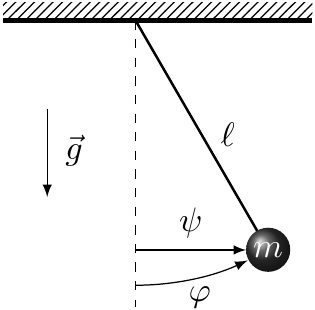

#### Energía cinética
Dado que la longitud $\ell$ es constante es conveniente trabajar en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que vá en $\hat{\varphi}$ es decir $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Así
$$
T= \frac{m}{2} \dot{\vec{r}}^2= \frac{m}{2} \ell^2 \dot{\varphi}^2.
$$


En la expresión de la energía cinética del sistema anterior no figura la coordenada generalizada de la $m_1$ que es $x$, la posición de la suspensión

In [13]:
T

Pero si figura la velocidad generalizada $\dot{x}$ que corresponde a esa coordenada.
Si el punto de suspensión estará fijado, evidentemente $\dot{x}$ debe ser $0$.

In [14]:
suspensiónFija_T = T.subs(x.diff(t), 0) # subs: substitución
suspensiónFija_T

En esa expresión se puede obtener un factor común $\ell^2 \dot{\varphi}^2$ dejando entre paréntesis la suma del cuadrado del seno y la del coseno.
Esto como sabemos se simplifica en un $1$.

In [15]:
suspensiónFija_T.simplify()

Ésta es la misma expresión de $T$ que la del péndulo ideal.

El potencial gravitatorio es $V(y)= m g y$.
Se establece que para $y=0$ es nulo, es decir $V(y=0)= 0$.
Y dado que que se utilizaron coordenadas cilíndricas $y= -\ell \cos{\varphi}$, entonces
$$
V(\varphi)= -m g \ell \cos{\varphi}.
$$

Como ni $x_1$ ni $\dot{x}_1$ tienen ningún papel en la energía potencial esta es la misma en el péndulo que en este sistema. 